In [1]:
from multiclassificationmodel import *
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('train.csv')
data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### X_train and y_train

In [3]:
x_train = data.drop(columns='label')
y_train = data['label']
x_train, y_train

(       pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
 0           0       0       0       0       0       0       0       0       0   
 1           0       0       0       0       0       0       0       0       0   
 2           0       0       0       0       0       0       0       0       0   
 3           0       0       0       0       0       0       0       0       0   
 4           0       0       0       0       0       0       0       0       0   
 ...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
 41995       0       0       0       0       0       0       0       0       0   
 41996       0       0       0       0       0       0       0       0       0   
 41997       0       0       0       0       0       0       0       0       0   
 41998       0       0       0       0       0       0       0       0       0   
 41999       0       0       0       0       0       0       0       0       0   
 
        pixel9

### Take an sample and visualize 

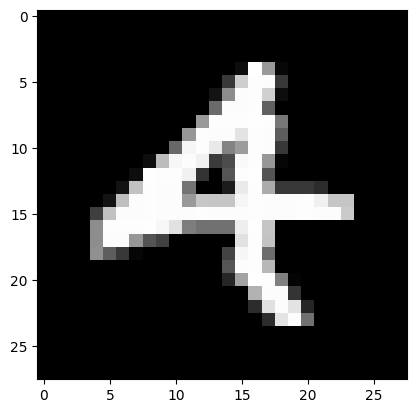

In [4]:
rand_id = np.random.randint(0, 42000)
sample = x_train.iloc[rand_id, :].to_numpy().reshape(28, 28)

plt.imshow(sample, cmap = 'gray')


### Convert x data to 0 and 1 (Black and White image)

In [5]:
def convert(img):
    for i in range(len(img)):
        for j in range(len(img[i])):
            if img[i][j] > 0:
                img[i][j] = 1
    return img

def convert_data(x_train):
    for i in tqdm(range(len(x_train)), desc='converting data'):
        xi = x_train.iloc[i, :]
        img = np.array(xi).reshape(28, 28)
        con = convert(img)
        x_train.iloc[i, :] = np.array(con).reshape(784, )

In [6]:
convert_data(x_train)
x_train.iloc[0, :].unique()

converting data: 100%|██████████| 42000/42000 [00:08<00:00, 4769.18it/s]


array([0, 1], dtype=int64)

after convert

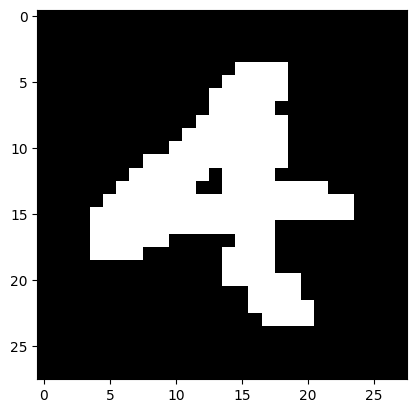

In [7]:
sample = x_train.iloc[rand_id, :].to_numpy().reshape(28, 28)
plt.imshow(sample, cmap = 'gray')

### One hot coding for y

In [8]:
def one_hot_coding(y_train):
    m = len(y_train.unique())
    y_new = []
    for i in y_train.values:
        y_n = [0] * m
        y_n[i] = 1
        y_new.append(y_n)
    y_new = pd.DataFrame(y_new)
    return y_new

y_train before one hot

In [9]:
y_train

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64

y_train after one hot

In [10]:
y_train_one_hot = one_hot_coding(y_train)
y_train_one_hot.index = y_train
y_train_one_hot

,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
1,0,1,0,0,0,0,0,0,0,0
0,1,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0
0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
0,1,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,1,0,0


### Caling the model

In [11]:
model = MultiClassification()

In [34]:
# model.empty_file() # uncomment to empty weights and bias file for training

In [13]:
if model.is_file_empty('weights.npy') or model.is_file_empty('bias.npy'):
    training = True
else:
    training = False
training

True

training

In [14]:
if training:
    model.empty_file()
    model.fit(x_train, y_train, learning_rate=0.001, batch_size=64, epochs=10000)
else:
    model.get_weights_bias()

Generate new weights and bias


Epochs : 100%|██████████| 10000/10000 [05:06<00:00, 32.61it/s]

Complete Saving Weights and Bias


y predict

In [15]:
y_pred = model.predict(x_train)
comp = pd.DataFrame({'y predict' : y_pred,
                     'y train': y_train.to_numpy()})
comp

,y predict,y train
0,1,1
1,0,0
2,1,1
3,4,4
4,0,0
...,...,...
41995,0,0
41996,1,1
41997,7,7
41998,6,6


accuracy

In [16]:
acc = model.accuracy(y_train, y_pred)
print("accuracy training set :", acc)

accuracy training set : 0.9267380952380952


### Loss

In [17]:
y_pred_one_hot = one_hot_coding(pd.Series(y_pred))

In [18]:
loss = model.loss(y_train_one_hot.values, y_pred_one_hot.values)
print("loss training set :", loss)

loss training set : 2.0243012374702634


accuracy per 100 epochs

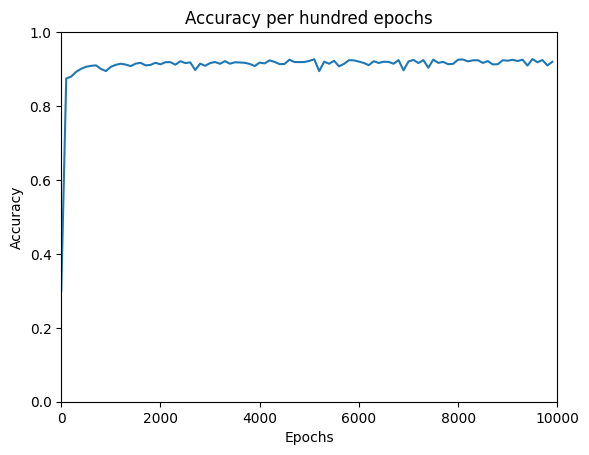

In [19]:
epoch = np.arange(0, 10000, 100)
plt.plot(epoch, model.accuracy_point)
plt.title('Accuracy per hundred epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.axis([0, 10000, 0.0, 1.0])
plt.show()

loss per 100 epochs

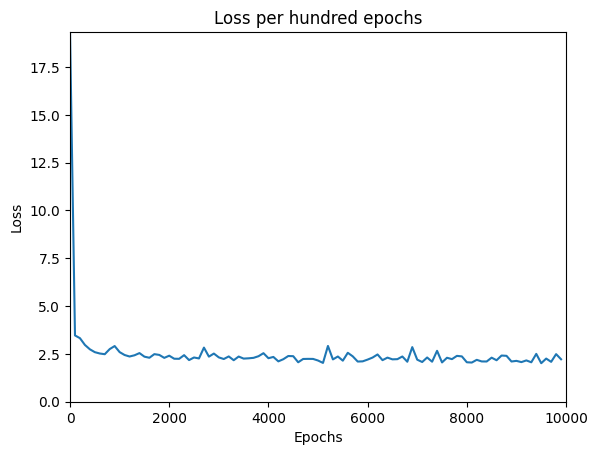

In [20]:
plt.plot(epoch, model.epoch_loss, label = 'Loss')
plt.title('Loss per hundred epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.axis([0, 10000, 0.0, max(model.epoch_loss)])
plt.show()

### Test dataset

convert test set

In [21]:
x_test = pd.read_csv('test.csv')
convert_data(x_test)

converting data: 100%|██████████| 28000/28000 [00:05<00:00, 4739.58it/s]


one hot y test

In [22]:
y_test = pd.read_csv('submission.csv')
y_test = y_test['Label']
y_test_one_hot = one_hot_coding(y_test)
y_test_one_hot.index = y_test

predicting y test

In [24]:
y_pred_test = model.predict(x_test)

#### accuracy test set

In [25]:
acc_test = model.accuracy(y_test, y_pred_test)
print('accuracy test set :', acc_test)

accuracy test set : 0.9065357142857143


#### Loss test set

In [26]:
loss_test = model.loss(y_test_one_hot.values, one_hot_coding(pd.Series(y_pred_test)).values)
print("loss test set:", loss_test)

loss test set: 2.582513652157513


In [27]:
def predict_test_set():
    rand = np.random.randint(0, 28000)
    x_rand = x_test.iloc[rand, :]
    x_rand = np.array(x_rand).reshape(28, 28)
    plt.imshow(x_rand, cmap='gray')
    plt.show()
    y_pred = model.predict_single_point(x_rand.reshape(784, 1))
    print("y_predict :", y_pred)

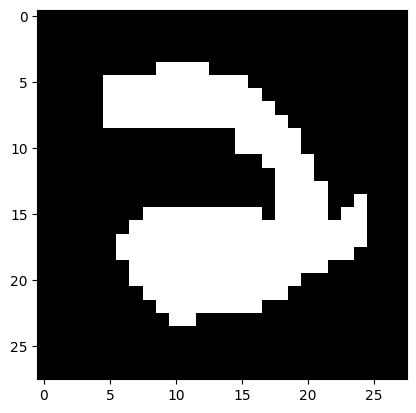

y_predict : 2


In [33]:
predict_test_set()